# Import modules

In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load data

Load the benchmarks generated using `makefiles/sermods.mk`.

In [3]:
RESULTS_PATH = os.path.join('data', 'processed', 'benchmarks')

benchmarks = {}

with open(os.path.join(RESULTS_PATH, 'sergifs_benchmark.dat'), 'rb') as f:
    benchmarks['GIF'] = pickle.load(f)
    f.close()
    
with open(os.path.join(RESULTS_PATH, 'serkgifs_benchmark.dat'), 'rb') as f:
    benchmarks['KGIF'] = pickle.load(f)
    f.close()

# Inspect loaded data

In [4]:
benchmarks_df = pd.DataFrame()

for key, dict_ in benchmarks.iteritems():
    tmp_df = pd.DataFrame(dict_)
    tmp_df['modtype'] = [key] * tmp_df.shape[0]
    
    benchmarks_df = benchmarks_df.append(tmp_df)

benchmarks_df.reset_index(inplace = True, drop = True)

In [5]:
benchmarks_df.head()

,Md_vals,names,predictions,modtype
0,0.178631,DRN307,<src.SpikeTrainComparator.SpikeTrainComparator...,GIF
1,0.478057,DRN317,<src.SpikeTrainComparator.SpikeTrainComparator...,GIF
2,0.178443,DRN318,<src.SpikeTrainComparator.SpikeTrainComparator...,GIF
3,0.379274,DRN320,<src.SpikeTrainComparator.SpikeTrainComparator...,GIF
4,0.634222,DRN324,<src.SpikeTrainComparator.SpikeTrainComparator...,GIF


In [6]:
benchmarks_df.pivot(index='names', columns='modtype', values='Md_vals')

modtype,GIF,KGIF
names,,
DRN307,0.178631,0.238914
DRN317,0.478057,0.723169
DRN318,0.178443,0.328525
DRN320,0.379274,0.443832
DRN324,0.634222,0.658965
DRN384,0.341966,0.355764
DRN385,0.315841,0.364532
DRN386,0.282449,0.391945
JF3,0.344348,0.443528


# Plot benchmark

Look at quality of spiketrain predictions using Md*. As of 2019.05.03, Md* is computed using a rectangular window of 8ms width.

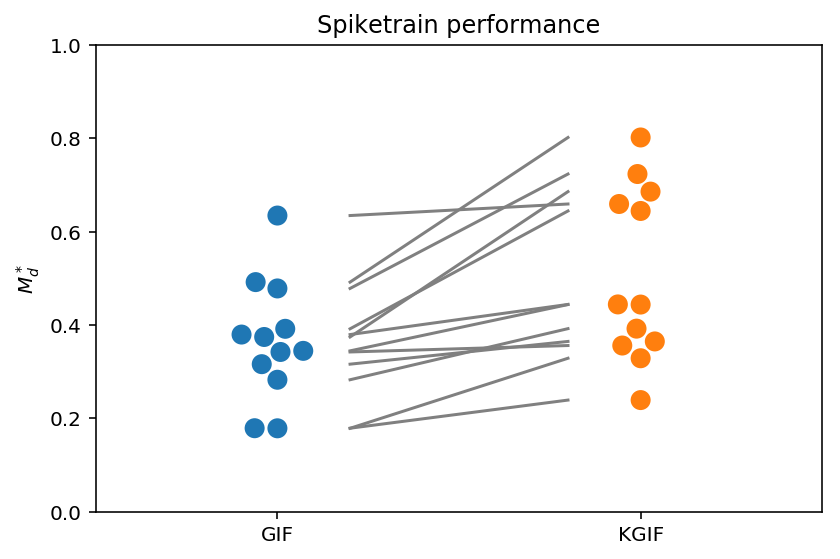

In [7]:
plt.figure()

plt.subplot(111)
plt.title('Spiketrain performance')
plt.ylim(0, 1)
sns.swarmplot(
    x = 'modtype', y = 'Md_vals', data = benchmarks_df,
    size = 10
)

lines_df = benchmarks_df.pivot(index='names', columns='modtype', values='Md_vals').T
plt.plot(
    np.array([[0.2, 0.8] for i in range(lines_df.shape[1])]).T,
    lines_df,
    color = 'gray'
)
plt.ylabel('$M_d^*$')
plt.xlabel('')

plt.tight_layout()
plt.show()

# Inspect spiketrains

DRN307
GIF -- Md*: 0.179
Percentage of variance explained: 2.6


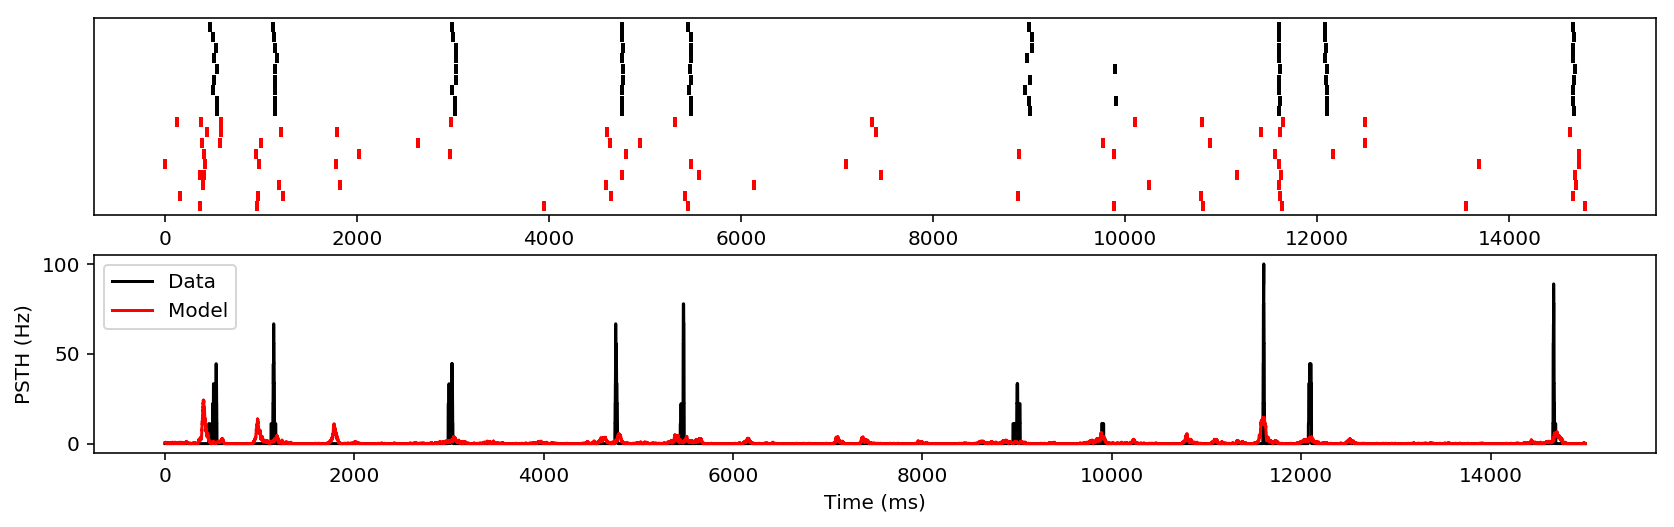

KGIF -- Md*: 0.239
Percentage of variance explained: 6.0


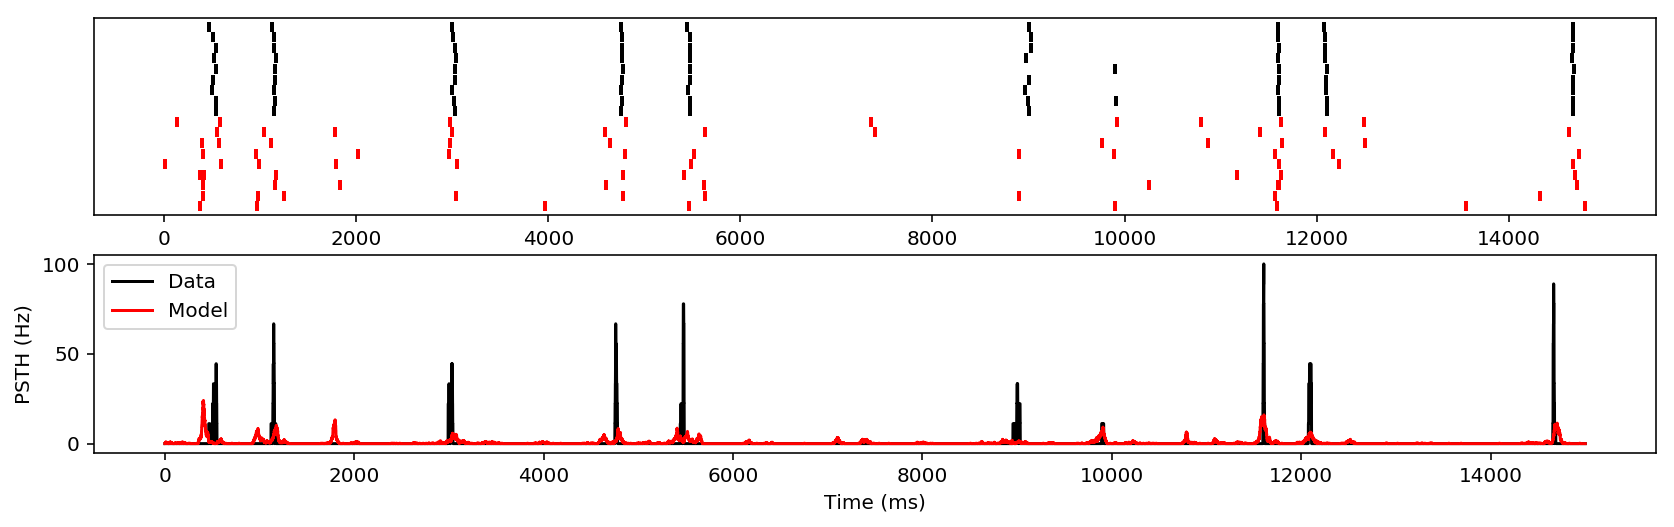

DRN317
GIF -- Md*: 0.478
Percentage of variance explained: 7.3


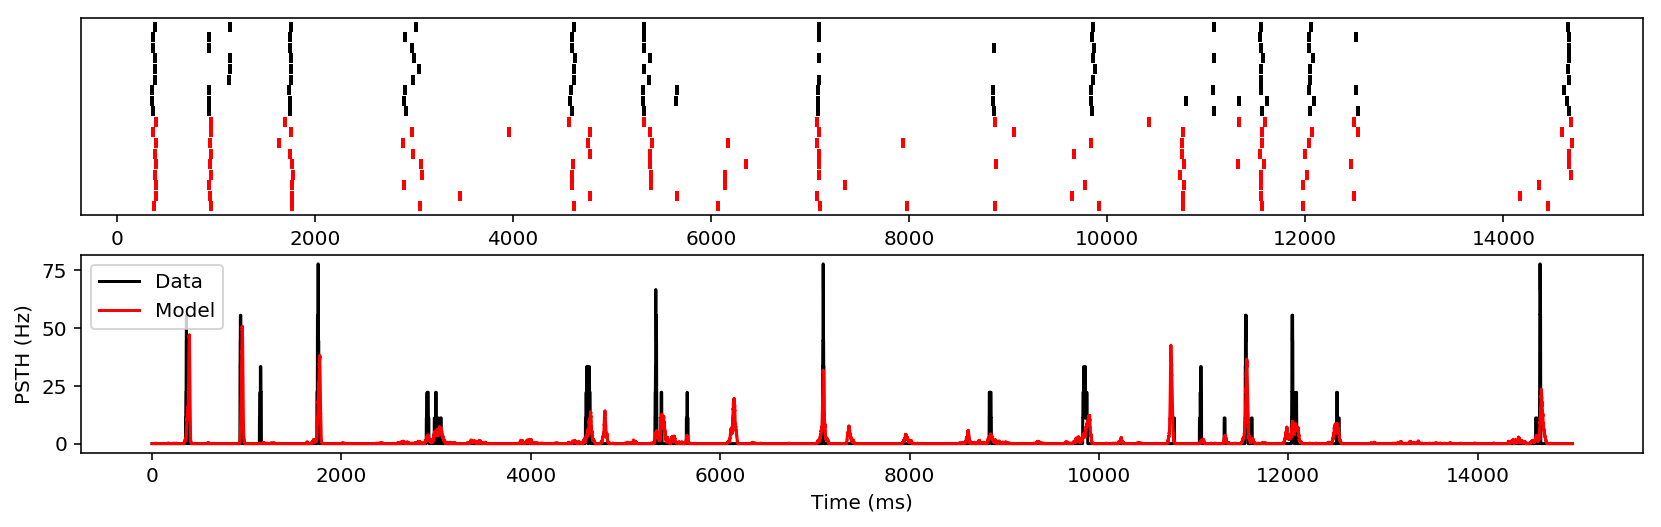

KGIF -- Md*: 0.723
Percentage of variance explained: 25.8


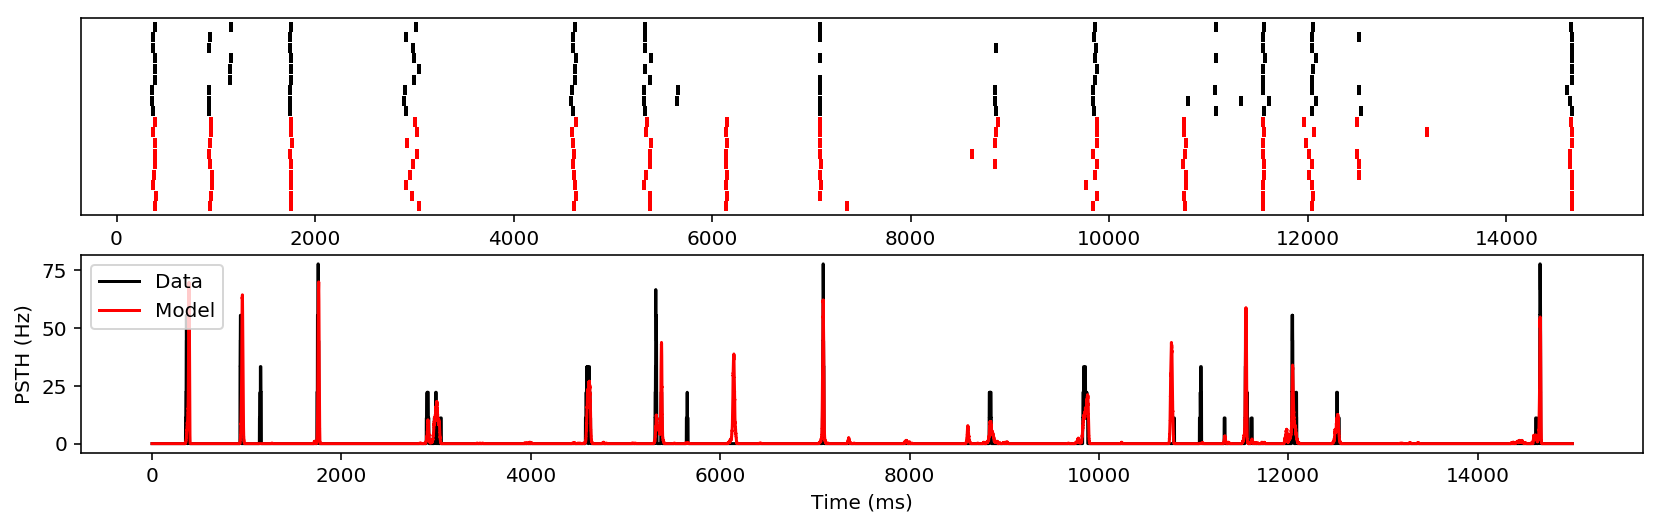

DRN318
GIF -- Md*: 0.178
Percentage of variance explained: -10.8


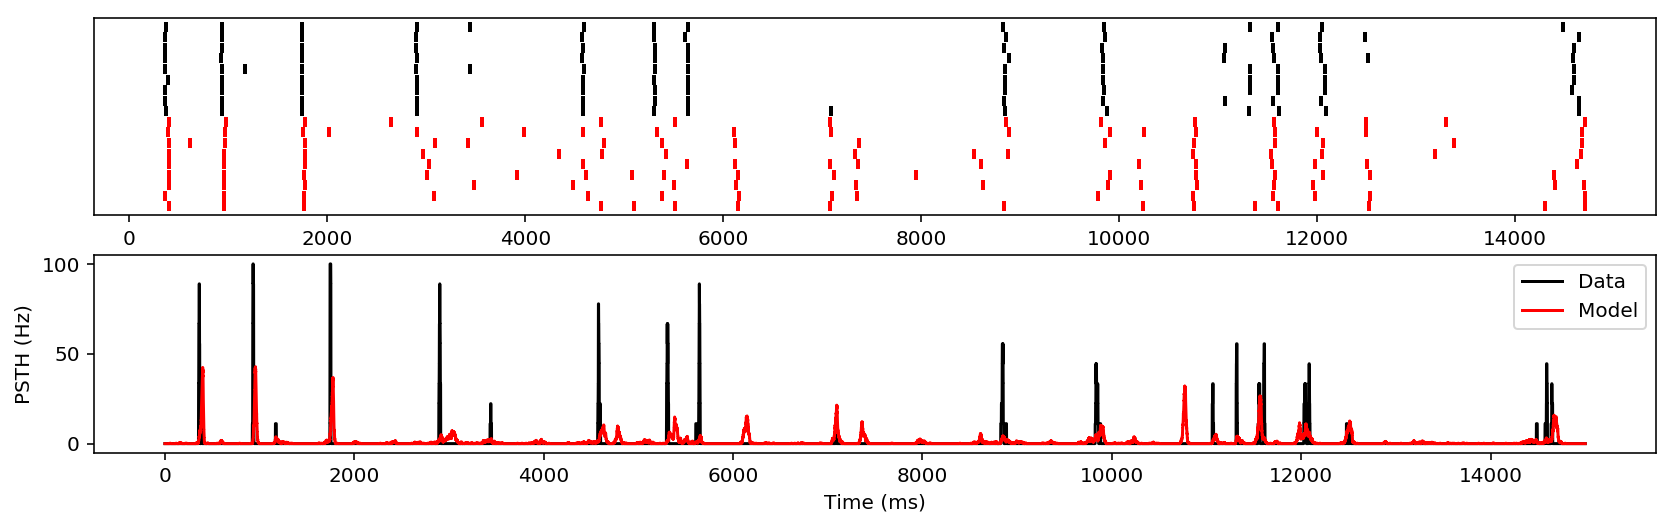

KGIF -- Md*: 0.329
Percentage of variance explained: 4.7


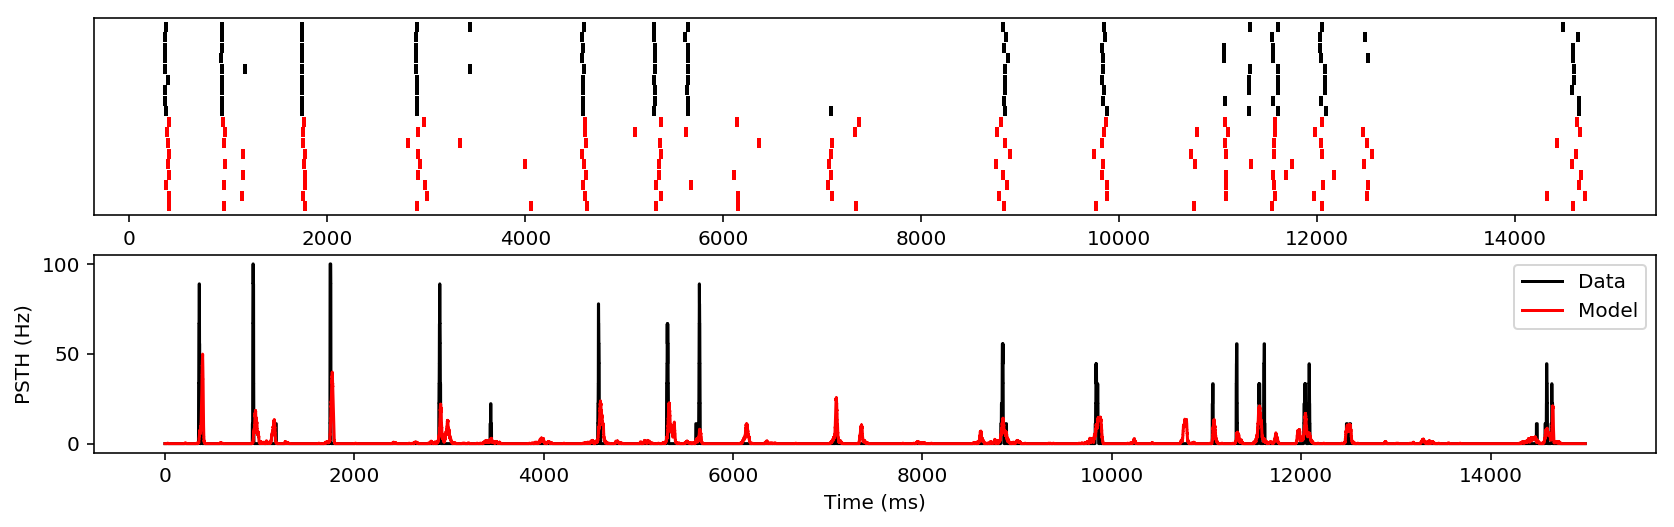

DRN320
GIF -- Md*: 0.379
Percentage of variance explained: 3.7


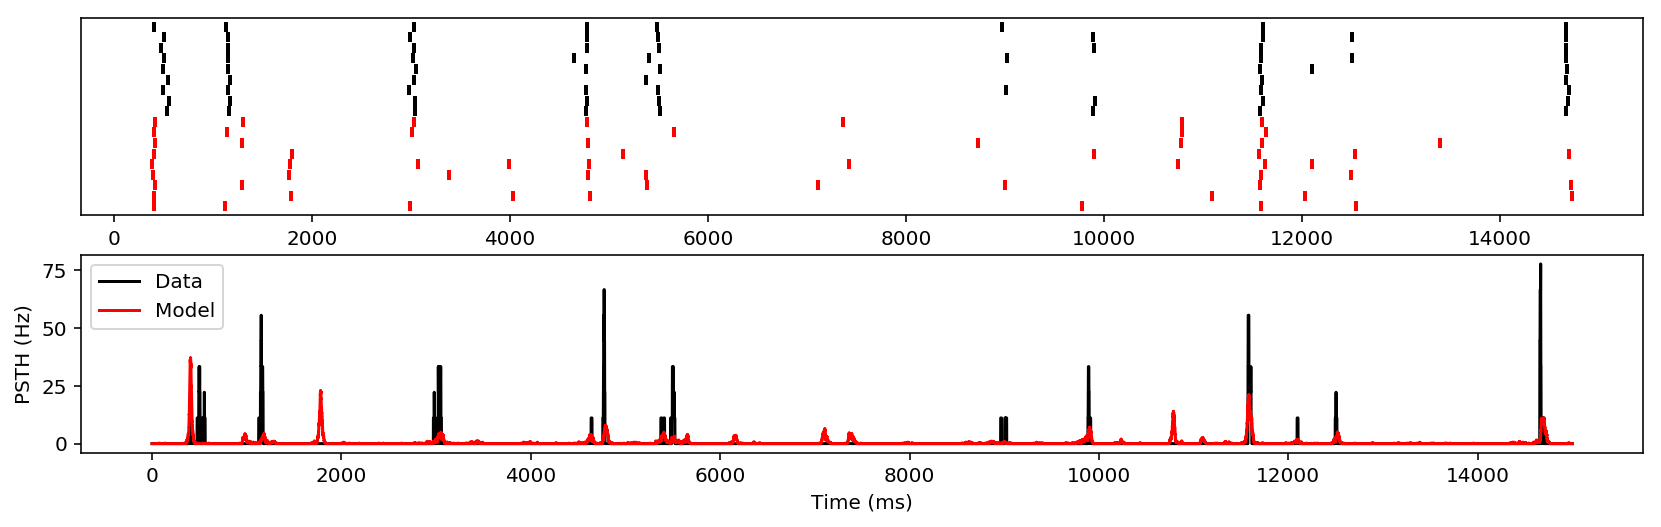

KGIF -- Md*: 0.444
Percentage of variance explained: 7.5


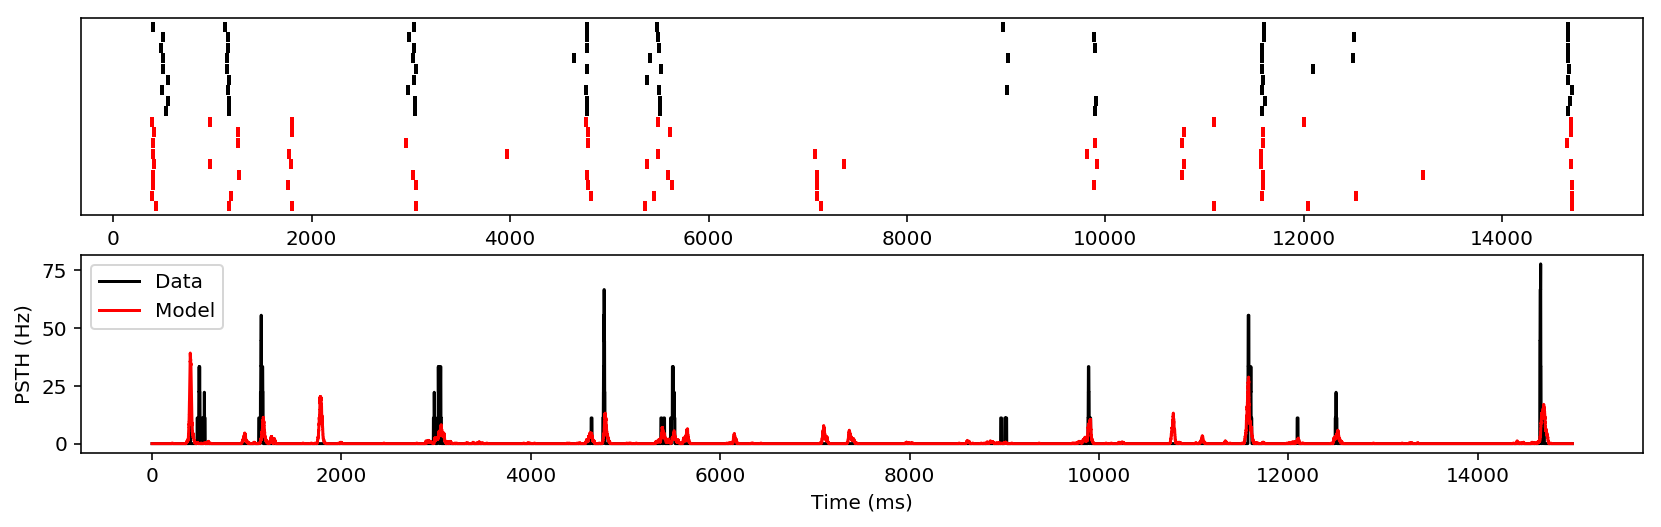

DRN324
GIF -- Md*: 0.634
Percentage of variance explained: 24.3


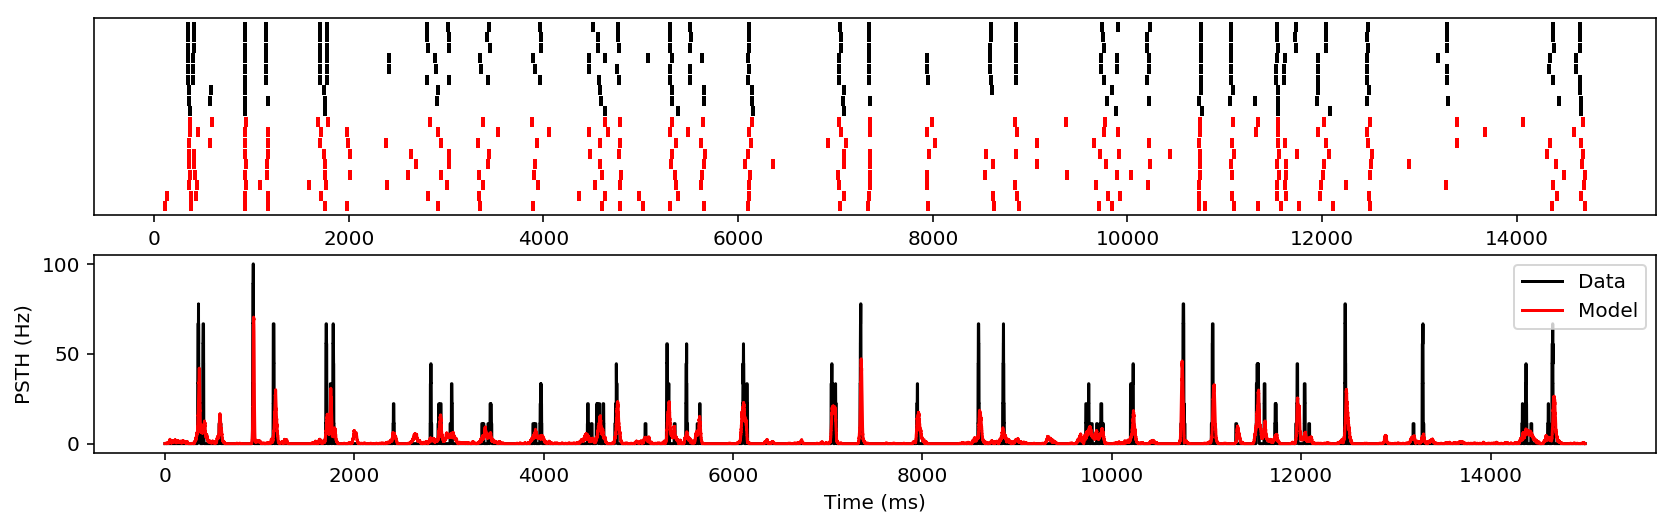

KGIF -- Md*: 0.659
Percentage of variance explained: 25.9


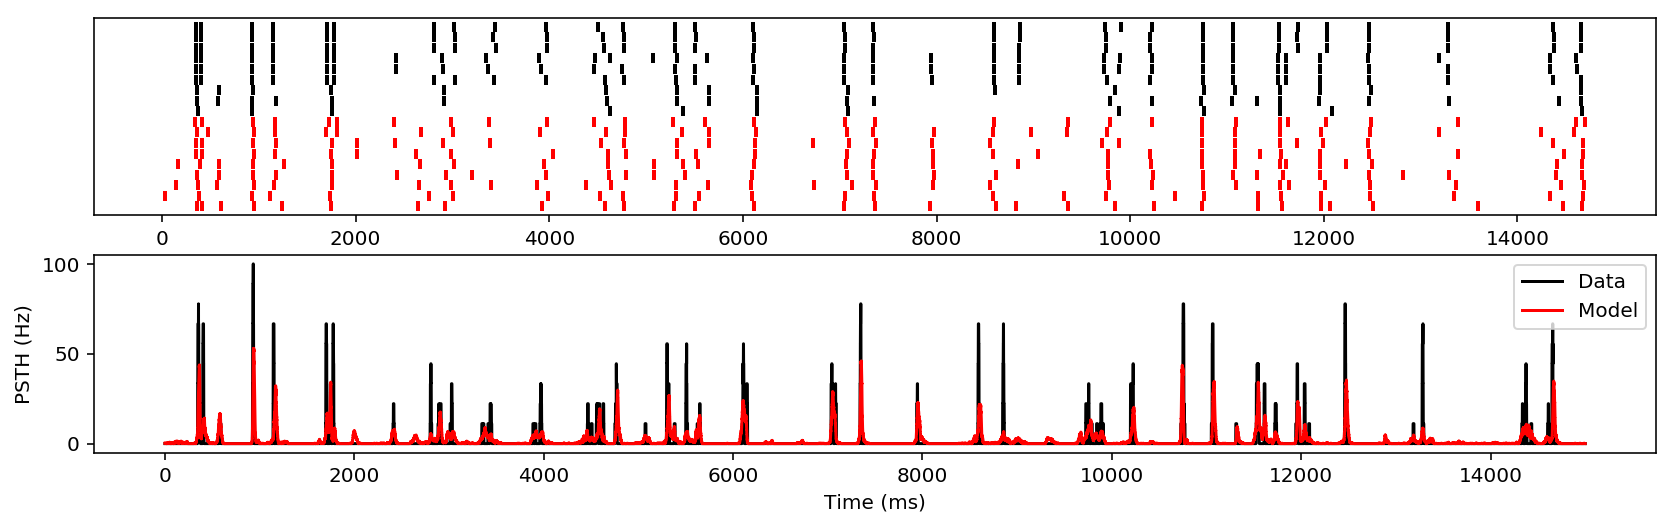

DRN384
GIF -- Md*: 0.342
Percentage of variance explained: 0.2


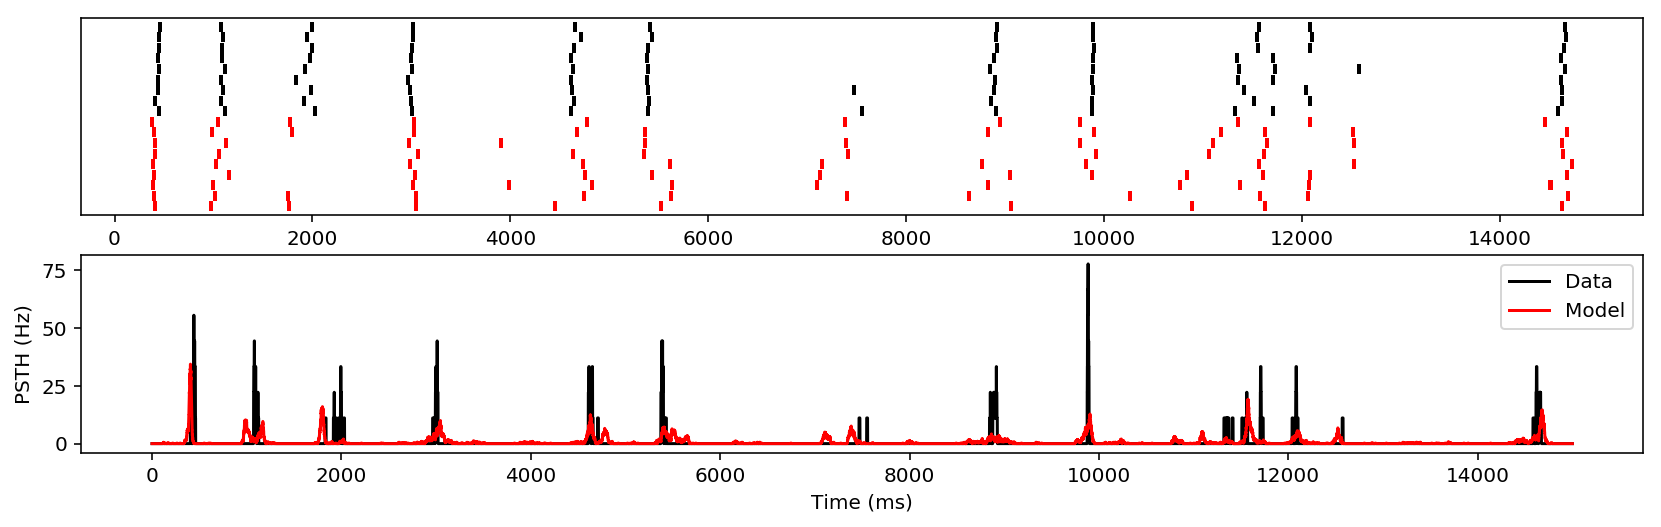

KGIF -- Md*: 0.356
Percentage of variance explained: 0.7


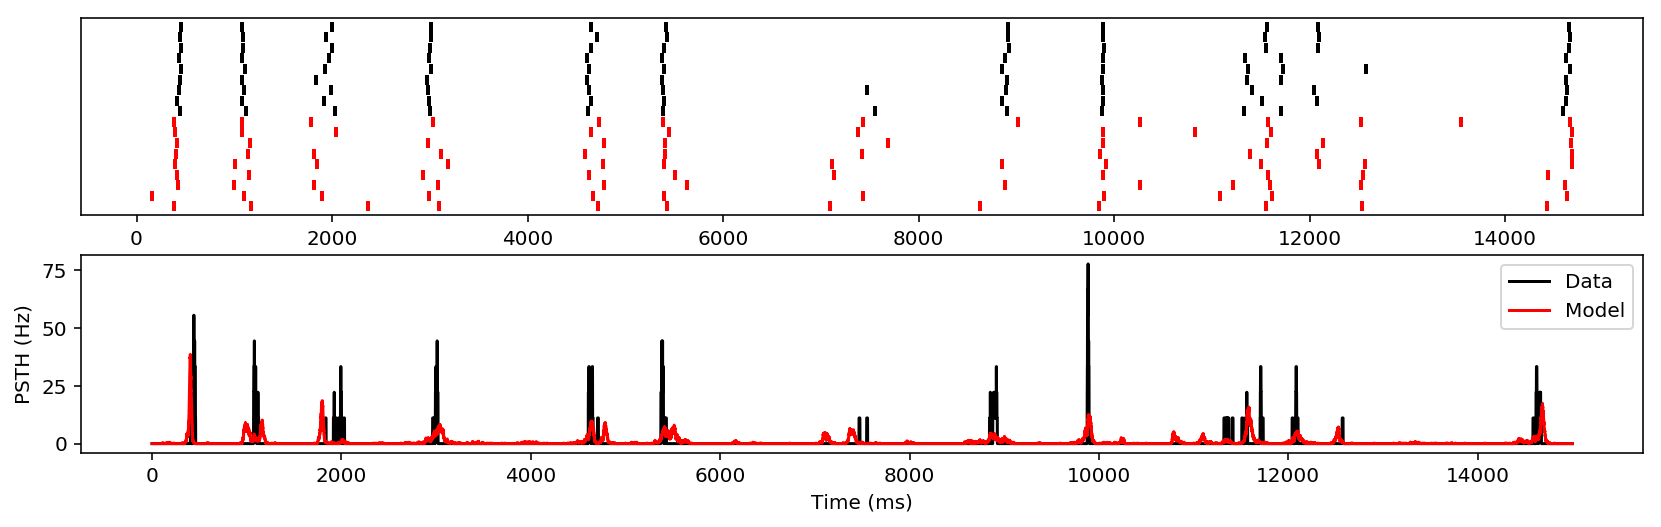

DRN385
GIF -- Md*: 0.316
Percentage of variance explained: 7.0


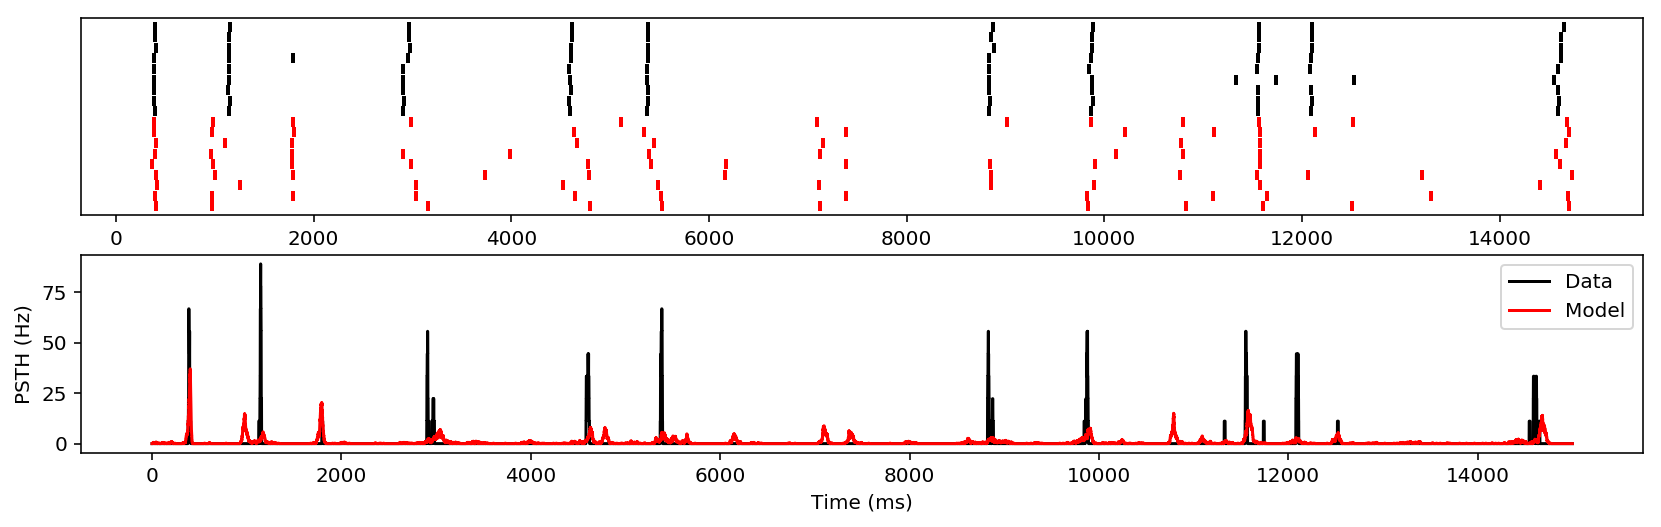

KGIF -- Md*: 0.365
Percentage of variance explained: 9.7


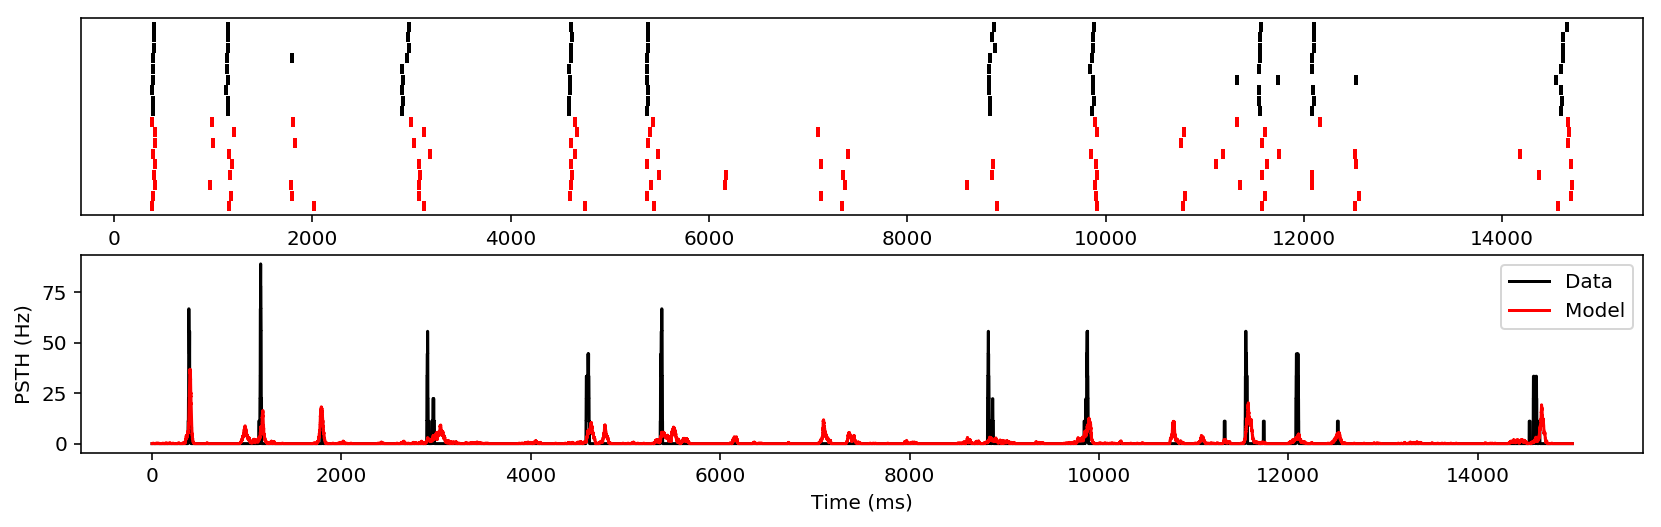

DRN386
GIF -- Md*: 0.282
Percentage of variance explained: 5.2


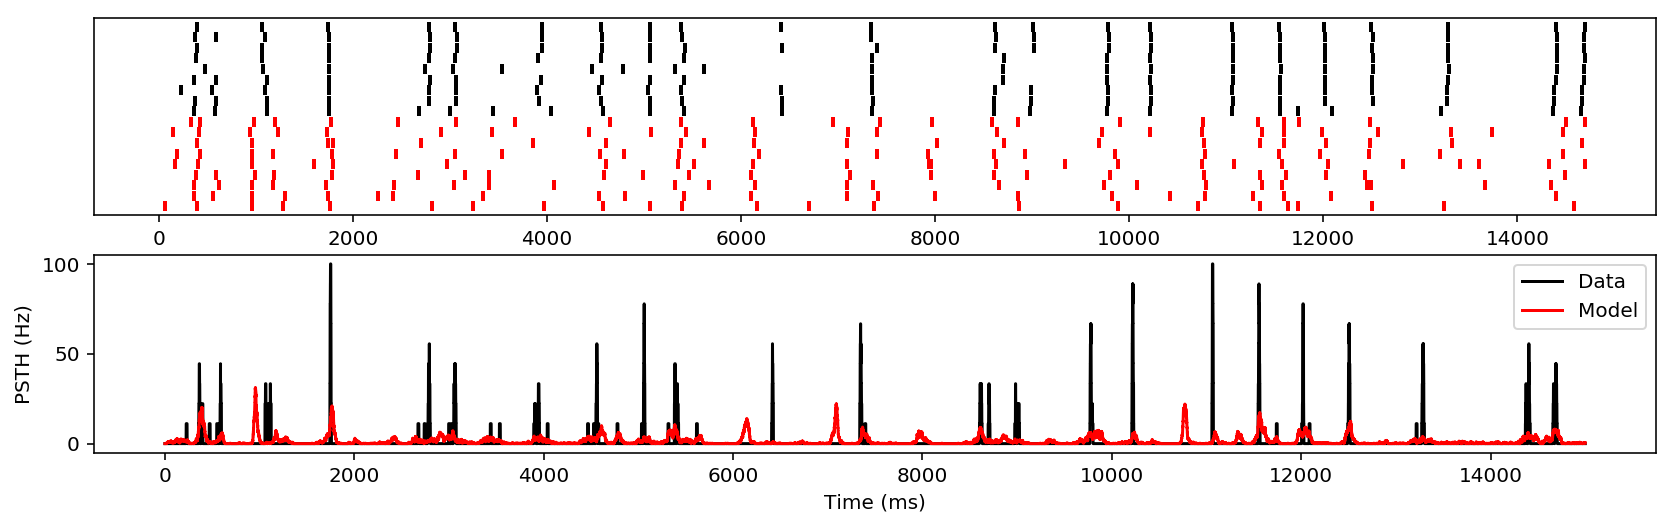

KGIF -- Md*: 0.392
Percentage of variance explained: 13.1


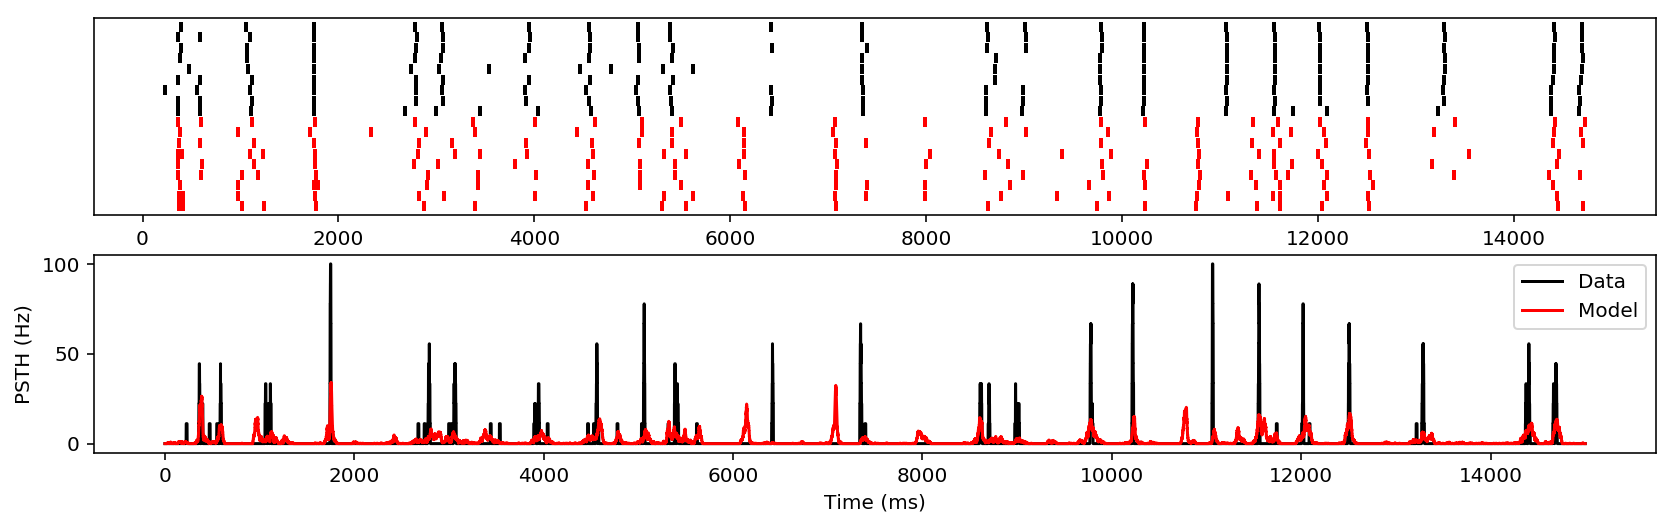

JF3
GIF -- Md*: 0.344
Percentage of variance explained: 13.1


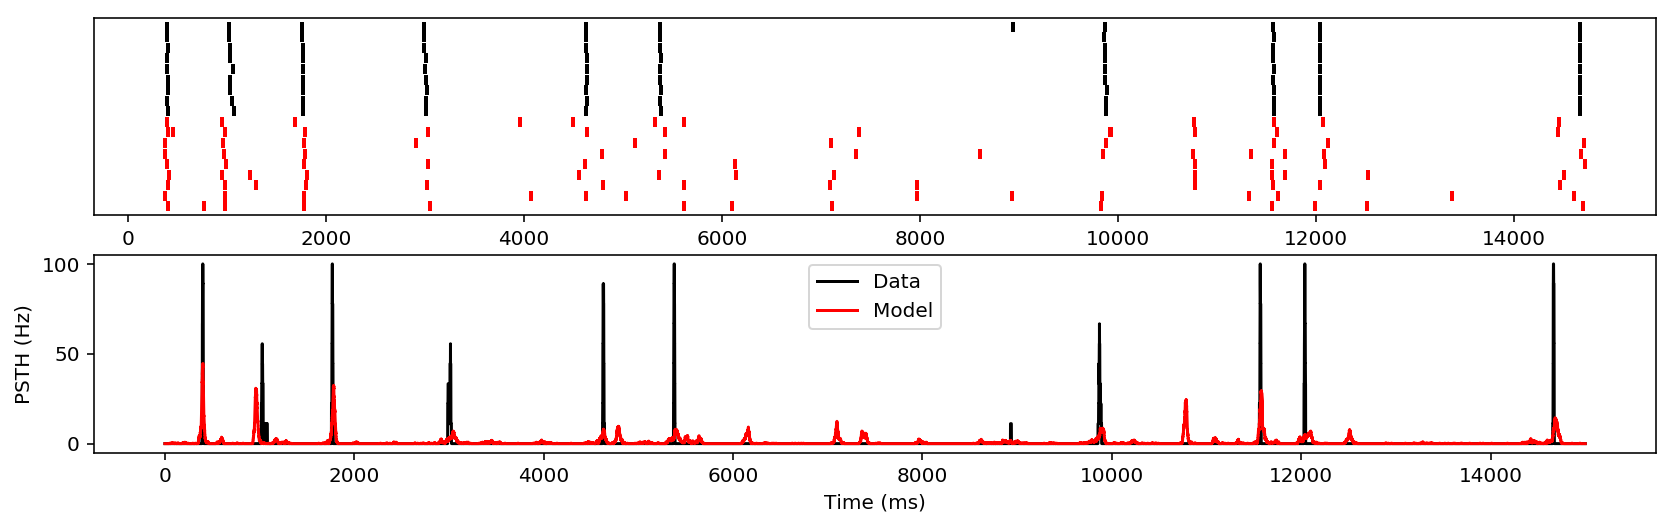

KGIF -- Md*: 0.444
Percentage of variance explained: 20.7


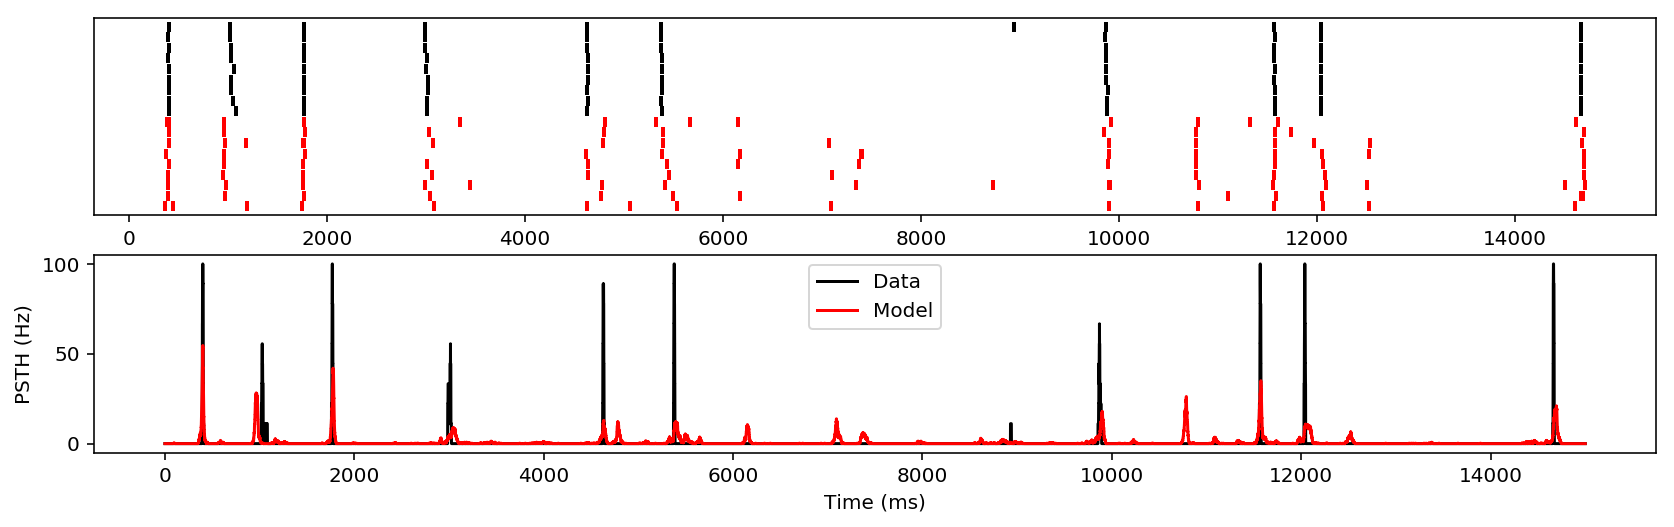

JF5
GIF -- Md*: 0.392
Percentage of variance explained: 11.7


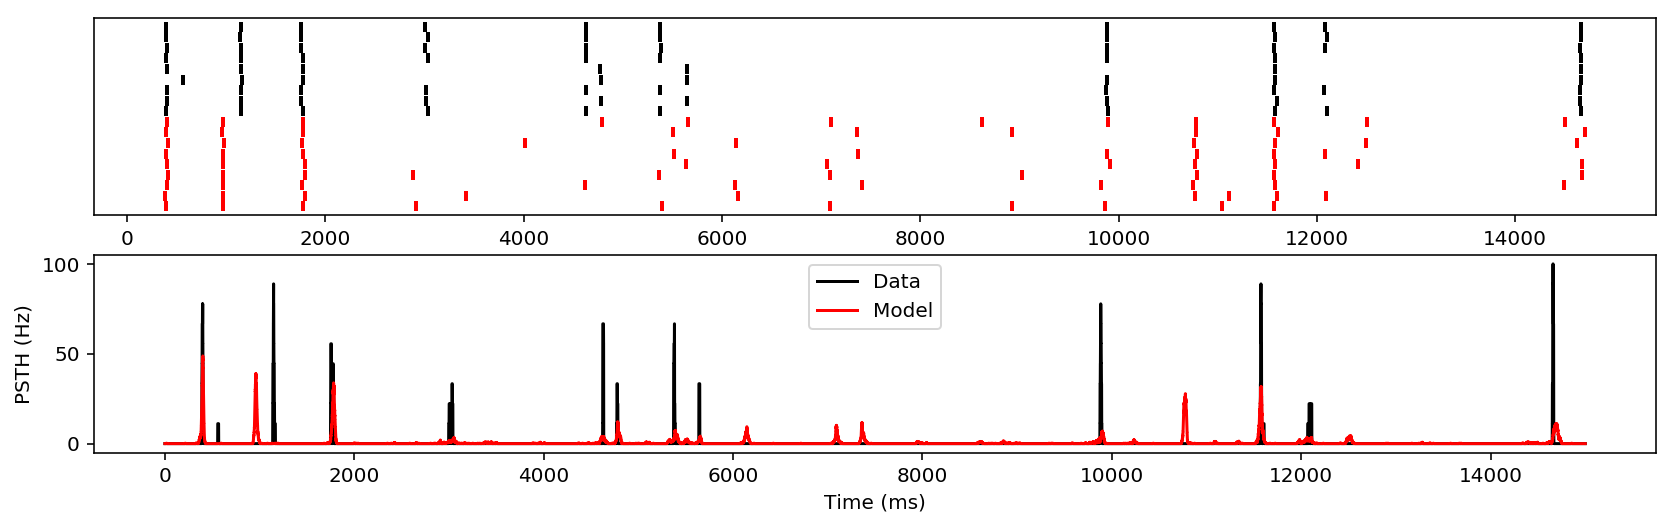

KGIF -- Md*: 0.644
Percentage of variance explained: 35.1


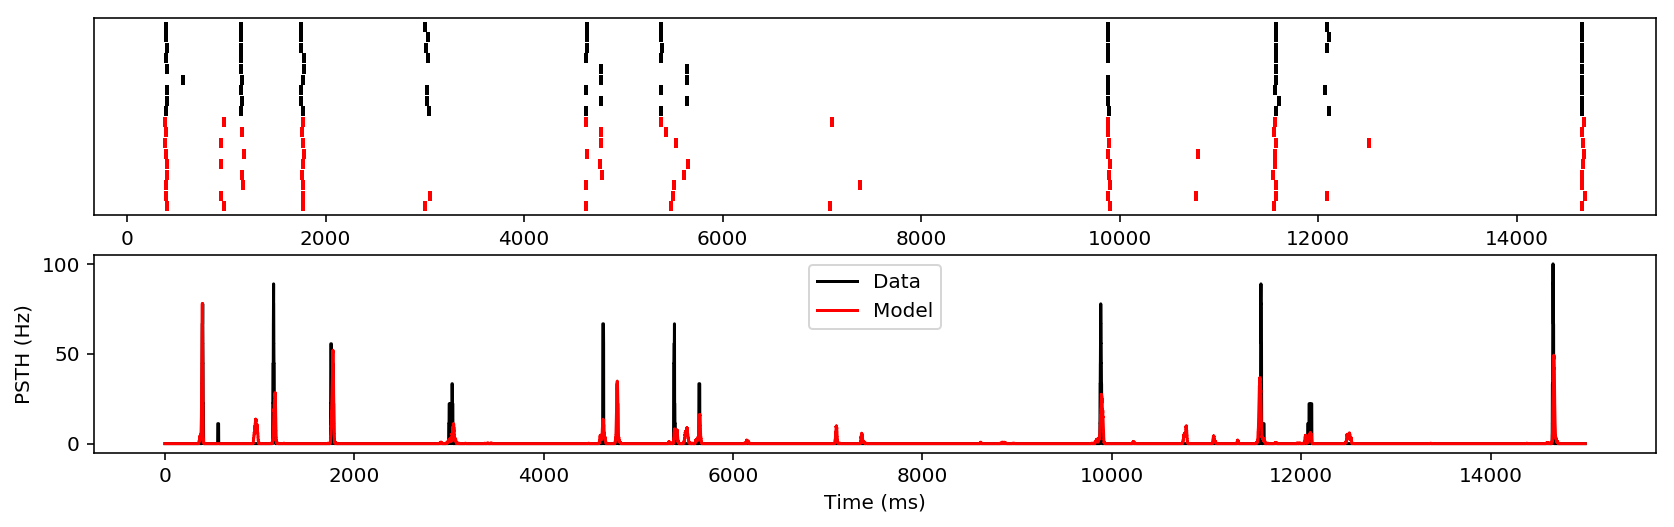

JF6
GIF -- Md*: 0.492
Percentage of variance explained: 19.4


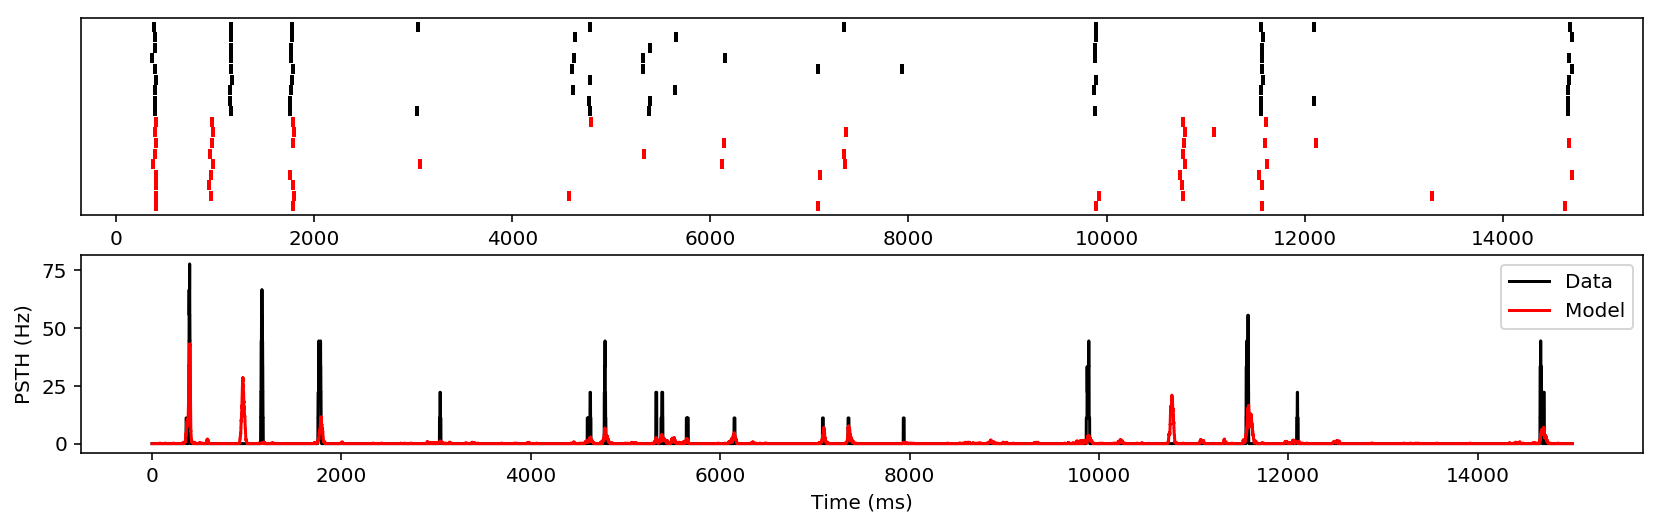

KGIF -- Md*: 0.801
Percentage of variance explained: 48.8


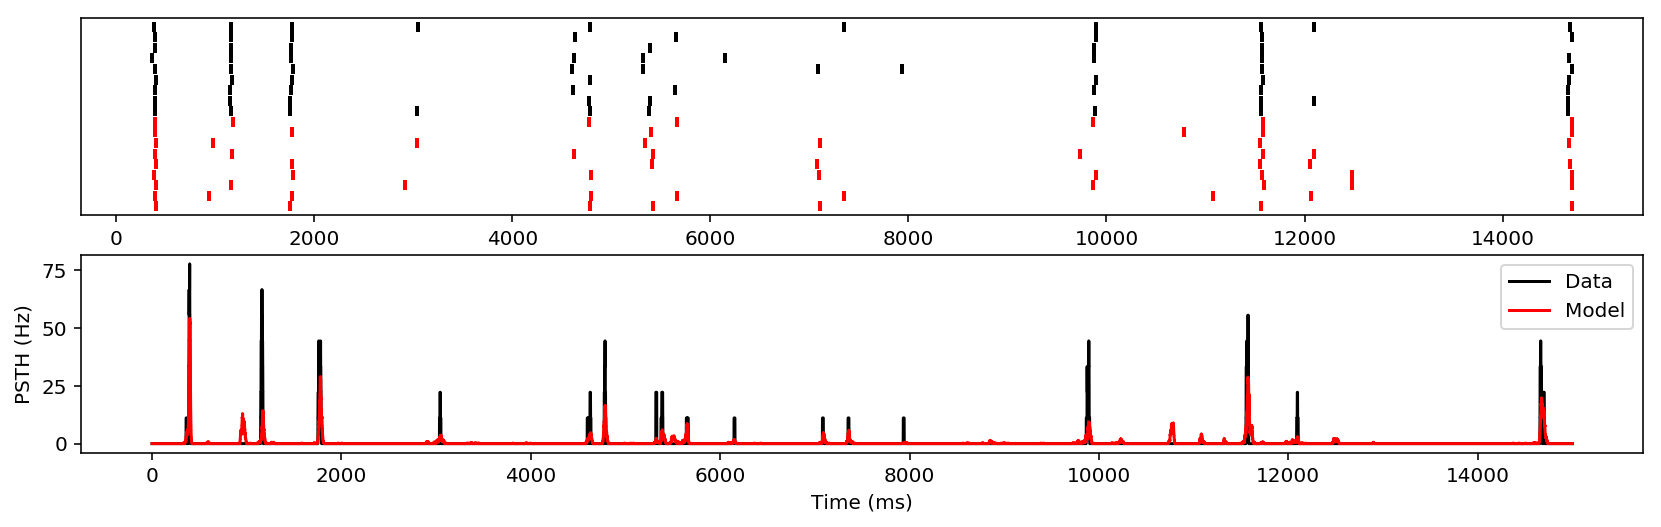

JF7
GIF -- Md*: 0.374
Percentage of variance explained: 9.5


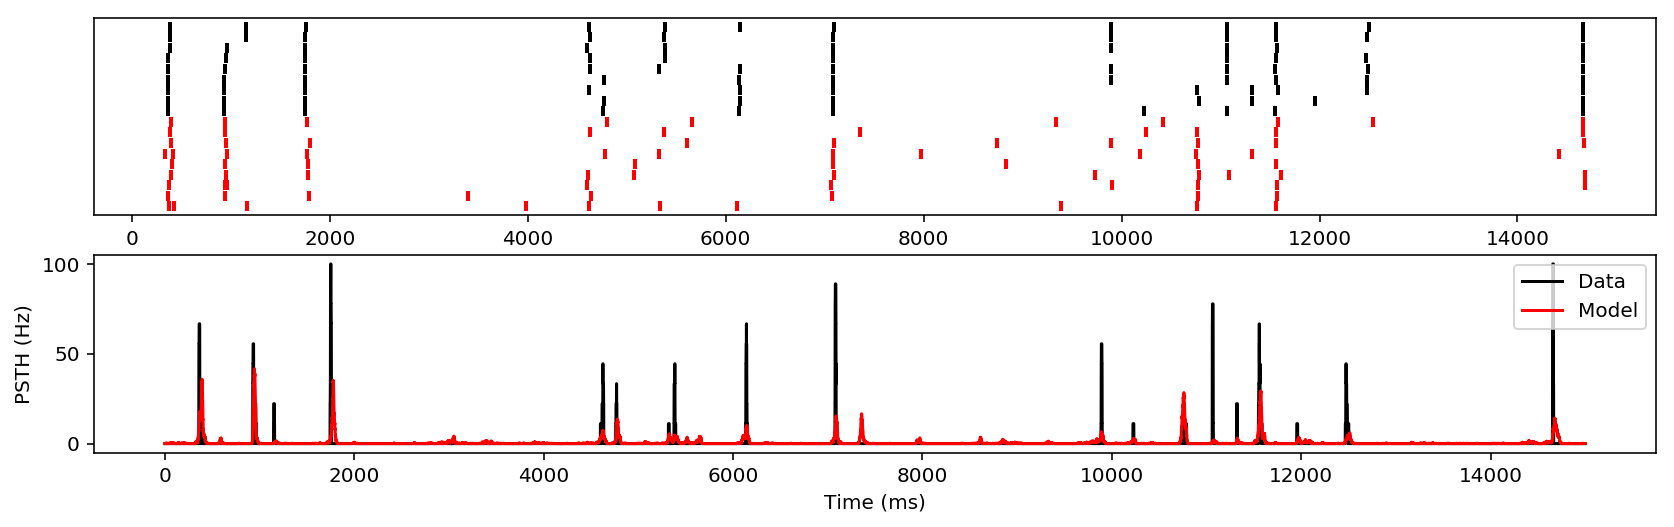

KGIF -- Md*: 0.685
Percentage of variance explained: 34.4


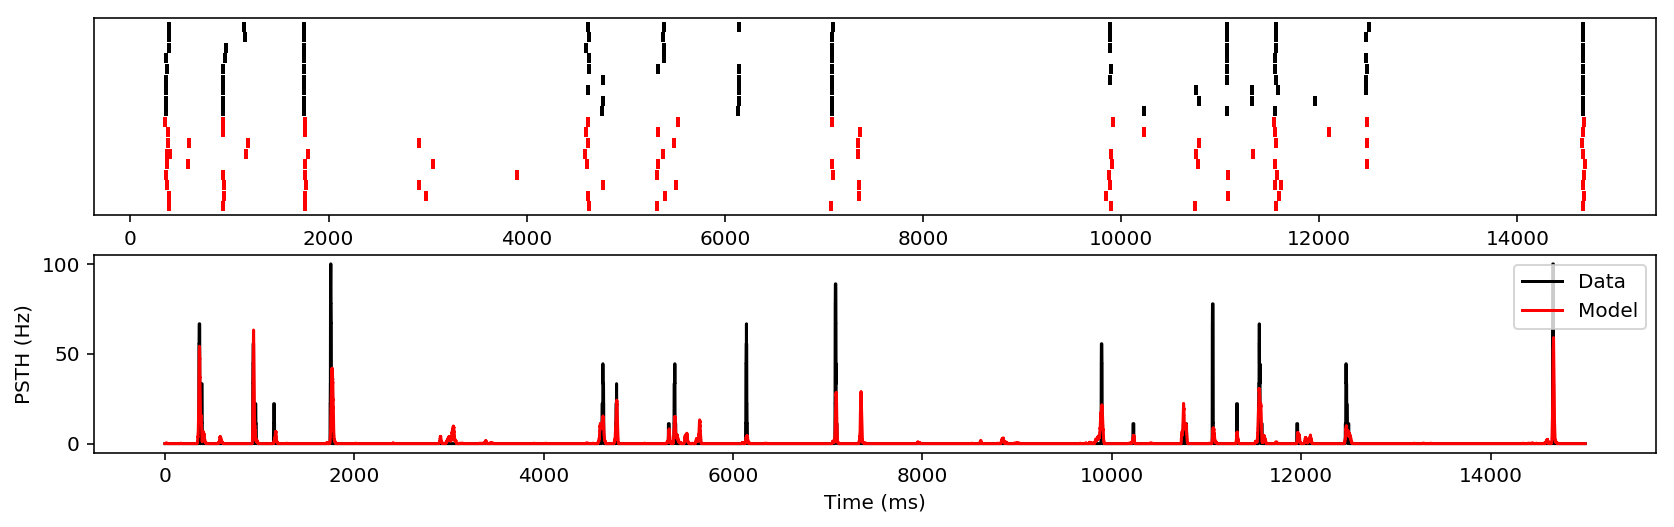

In [8]:
for name in benchmarks_df['names'].unique():
    print name
    for mod_type in benchmarks_df['modtype'].unique():
        row = benchmarks_df.loc[
            benchmarks_df.names.isin([name]) & benchmarks_df.modtype.isin([mod_type]), 
            :
        ]
        print '{} -- Md*: {:.3f}'.format(mod_type, row['Md_vals'].iat[0])
        row['predictions'].iat[0].plotRaster()